In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('/Users/sundeep/Learnings/1_PGP_DSBA/Project/7_car/car_data.csv') 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
# Unique values
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checxk missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000,301.000,301.000,301.000,301.000
mean,2013.628,4.661,7.628,36947.206,0.043
std,2.892,5.083,8.644,38886.884,0.248
min,2003.000,0.100,0.320,500.000,0.000
25%,2012.000,0.900,1.200,15000.000,0.000
50%,2014.000,3.600,6.400,32000.000,0.000
75%,2016.000,6.000,9.900,48767.000,0.000
max,2018.000,35.000,92.600,500000.000,3.000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [11]:
final_dataset['Current_Year'] = 2020

In [12]:
final_dataset['Number_Years'] = final_dataset['Current_Year'] - final_dataset['Year']

In [13]:
final_dataset.drop(['Year','Current_Year'],axis = 1 , inplace = True)

In [14]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.350,5.590,27000,0,6,0,1,0,1
1,4.750,9.540,43000,0,7,1,0,0,1
2,7.250,9.850,6900,0,3,0,1,0,1
3,2.850,4.150,5200,0,9,0,1,0,1
4,4.600,6.870,42450,0,6,1,0,0,1


In [16]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000,0.879,0.029,-0.088,-0.236,0.552,-0.541,-0.551,-0.367
Present_Price,0.879,1.000,0.204,0.008,0.048,0.473,-0.465,-0.512,-0.349
Kms_Driven,0.029,0.204,1.000,0.089,0.524,0.173,-0.173,-0.101,-0.163
Owner,-0.088,0.008,0.089,1.000,0.182,-0.053,0.056,0.124,-0.050
Number_Years,-0.236,0.048,0.524,0.182,1.000,-0.064,0.060,0.040,-0.000
Fuel_Type_Diesel,0.552,0.473,0.173,-0.053,-0.064,1.000,-0.980,-0.350,-0.099
Fuel_Type_Petrol,-0.541,-0.465,-0.173,0.056,0.060,-0.980,1.000,0.358,0.091
Seller_Type_Individual,-0.551,-0.512,-0.101,0.124,0.040,-0.350,0.358,1.000,0.063
Transmission_Manual,-0.367,-0.349,-0.163,-0.050,-0.000,-0.099,0.091,0.063,1.000


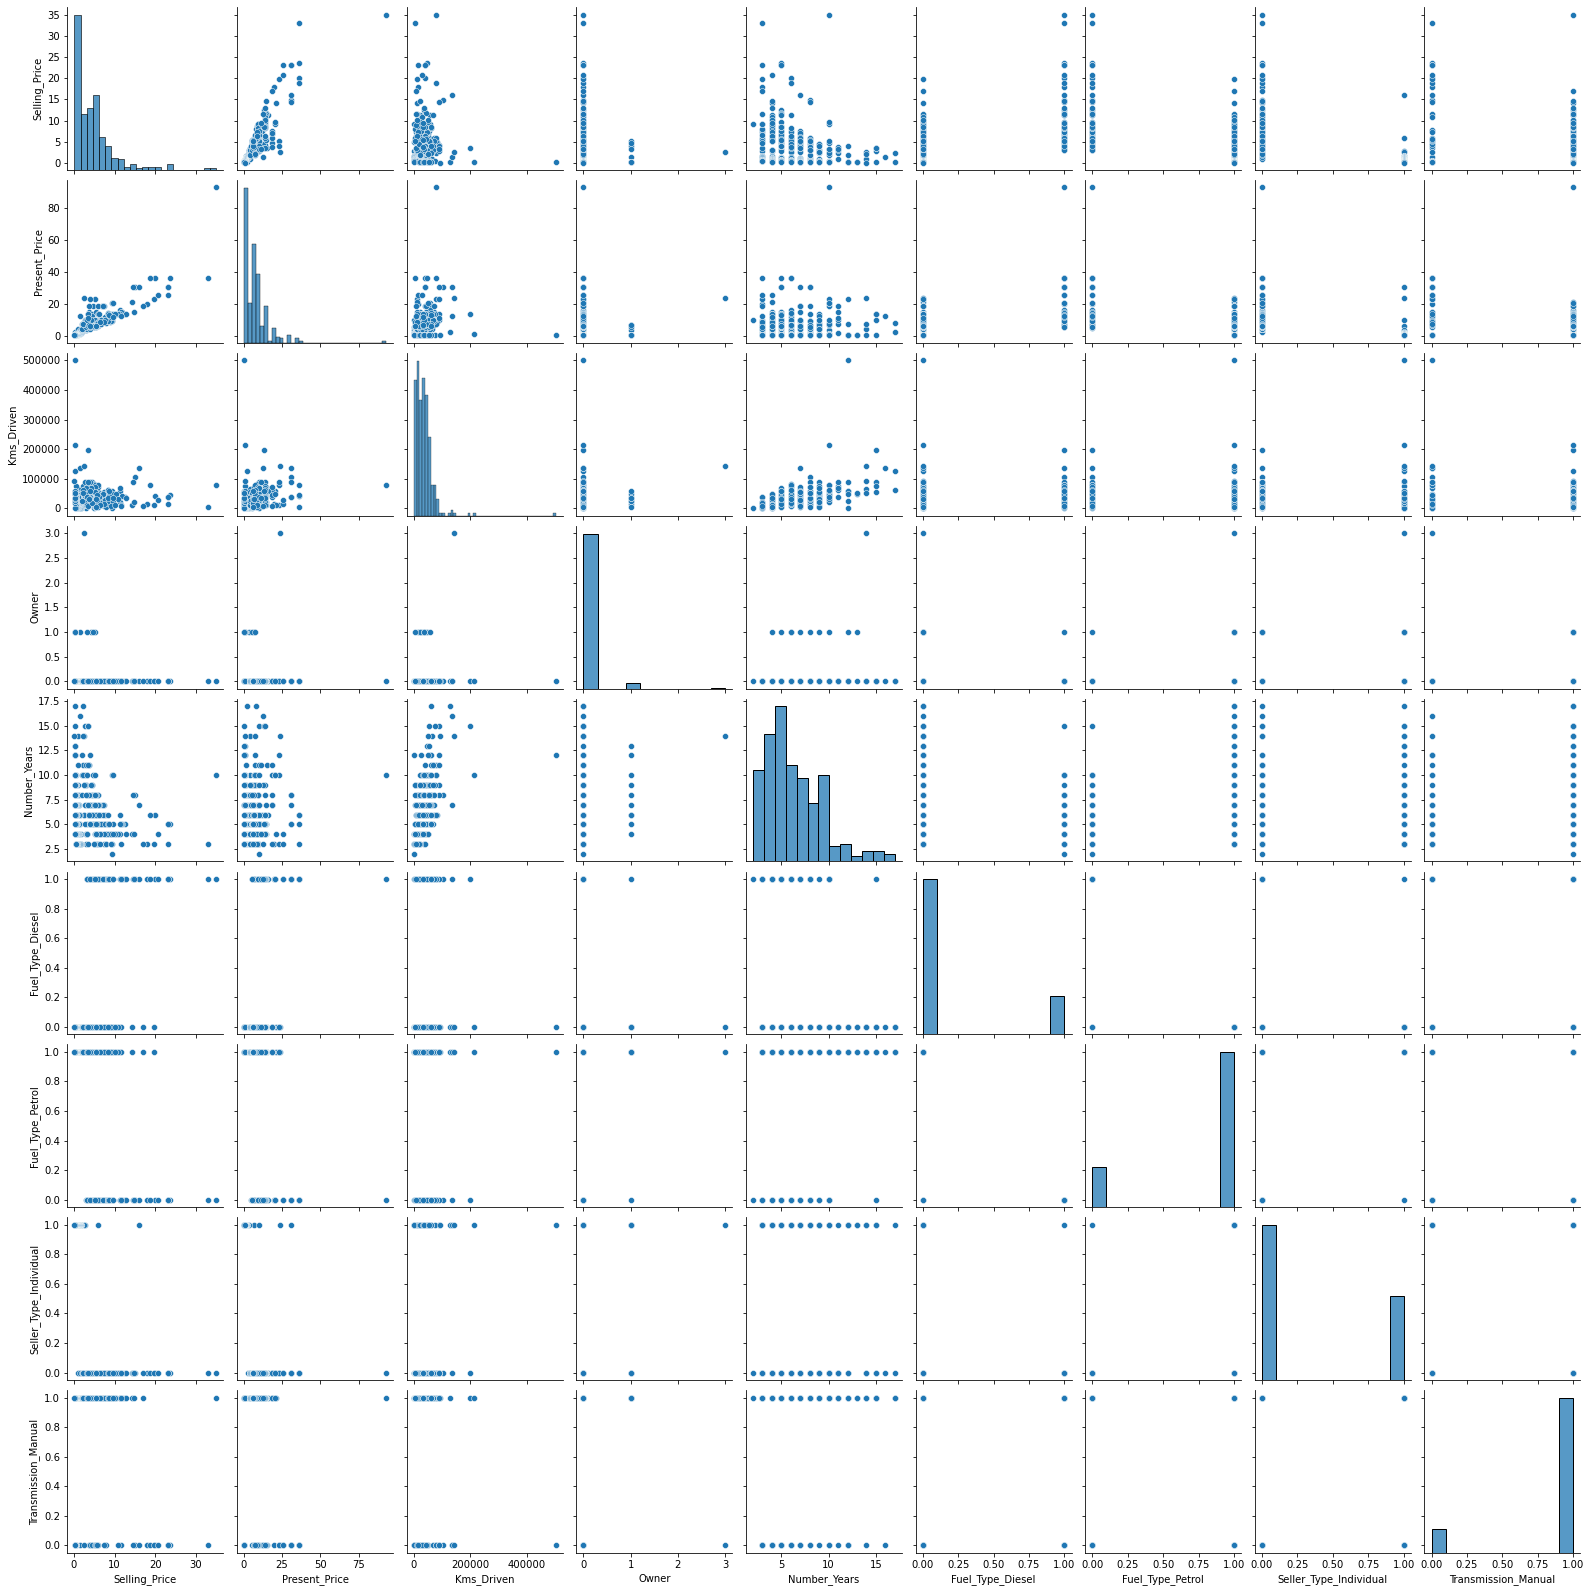

In [17]:
import seaborn as sns
sns.pairplot(final_dataset)

<AxesSubplot:>

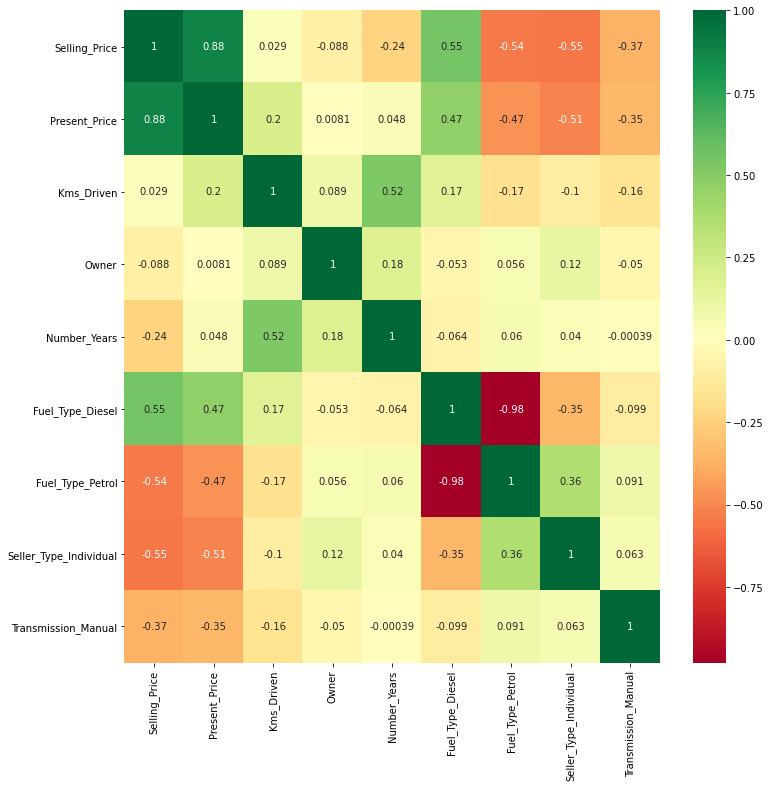

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [19]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [20]:
X.head()

,Present_Price,Kms_Driven,Owner,Number_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.590,27000,0,6,0,1,0,1
1,9.540,43000,0,7,1,0,0,1
2,9.850,6900,0,3,0,1,0,1
3,4.150,5200,0,9,0,1,0,1
4,6.870,42450,0,6,1,0,0,1


In [21]:
y.head()

0   3.350
1   4.750
2   7.250
3   2.850
4   4.600
Name: Selling_Price, dtype: float64

In [22]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
print((model.feature_importances_))

[3.89559231e-01 4.38128368e-02 3.23231312e-04 7.29342183e-02
 2.17370462e-01 9.94932237e-03 1.29416254e-01 1.36634444e-01]


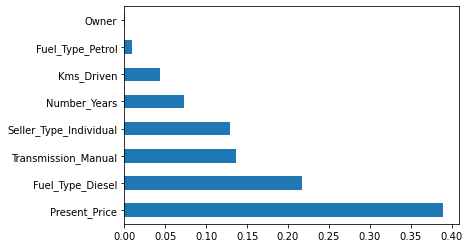

In [24]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [26]:
X_train

,Present_Price,Kms_Driven,Owner,Number_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
163,0.950,27000,0,10,0,1,1,1
121,1.500,6900,0,9,0,1,1,1
57,18.540,50000,0,10,0,1,0,1
287,7.500,44000,0,5,0,1,0,0
252,6.820,31427,0,5,0,1,0,0
...,...,...,...,...,...,...,...,...
277,13.600,21780,0,5,0,1,0,1
256,13.600,49562,0,4,0,1,0,1
131,0.820,18000,0,5,0,1,1,1
249,7.600,17000,0,4,0,1,0,1


In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [28]:
# Hyper parameters
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200 , num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [29]:
# Number of features to consider at every split
max_features = ['auto','sqrt']

In [30]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
max_depth

[5, 10, 15, 20, 25, 30]

In [31]:
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

In [32]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [33]:
# RandomizedSearchCV will give the best parameters of the model
from sklearn.model_selection import RandomizedSearchCV 
# In order to find out best parameters , we can use GridSearchCV also ,
# but RandomizedSearchCV is bit fast when compared to others.

In [34]:
random_grid = {'n_estimators'      : n_estimators,
               'max_features'      : max_features,
               'max_depth'         : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf'  : min_samples_leaf} # key value pairs
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [35]:
rf = RandomForestRegressor()

In [36]:
rf_random = RandomizedSearchCV(estimator = rf,
                              param_distributions = random_grid,
                              scoring = 'neg_mean_squared_error',
                              n_iter = 10, # Number of Iterations
                              cv = 5, # Cross Validation
                              verbose = 2, # To get the display of the processing
                              random_state = 3 ,
                              n_jobs = 1)

In [37]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=3, scoring='neg_mean_squared_error', verbose=2)

In [46]:
y_pred = rf_random.predict(X_test)

In [47]:
y_pred

array([ 0.39747778,  4.96766667,  5.34226667,  2.97155556,  0.4651    ,
        8.6255    , 15.80164444,  0.70286667,  7.39005556,  3.10916667,
        9.1213    ,  0.412     ,  3.62193333,  0.71673333,  3.36218889,
       10.29118889,  0.62845556,  2.93611111,  2.43585556,  0.73162222,
        0.2458    ,  3.04755556,  1.13162963,  0.26302222,  0.44311111,
        4.3735    ,  7.2353    , 11.96208889,  5.73245556,  0.608     ,
        4.35866667,  7.82568889,  1.55883333,  1.13062963,  2.77633333,
        5.09192222,  6.95634444,  3.42288889,  5.17135556,  1.18122222,
       10.4595    ,  2.52266667, 18.91266667,  3.09044444,  0.6646    ,
        2.19338889,  1.19527778,  2.96827778,  0.6067    , 18.73196667,
        0.53646667,  6.45202222,  6.66366667,  0.62245556,  5.05611111,
        0.7056    ,  3.96561111,  4.38722222,  4.32425556,  3.21766667,
        3.4947    ,  0.52387778,  1.01111111,  2.25944444,  0.67413333,
       10.41444444,  8.35721111, 21.23568889,  0.22128889, 18.51

/Users/sundeep/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

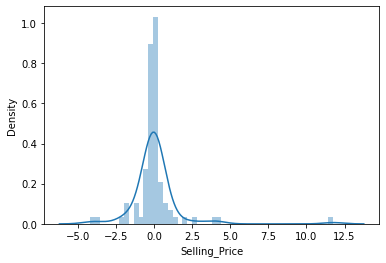

In [48]:
sns.distplot(y_test-y_pred)

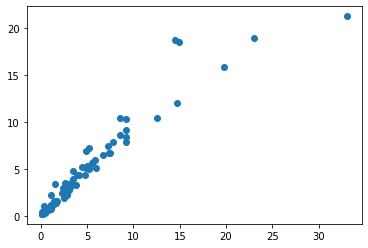

In [49]:
plt.scatter(y_test,y_pred)

In [42]:
# Deployment
import pickle
file = open('random_forest_regression_model.pkl' , 'wb') # wb - write byte mode

pickle.dump(rf_random , file)

In [50]:
from sklearn import metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.6942161986161993
MSE: 2.6725952139528735
RMSE: 1.6348073935338296


In [52]:
metrics.r2_score(y_test, y_pred)

0.9036662830271901